## Lowpass-Feedback Comb Filter

Lowpass-Feedback Comb Filter which is constructed using a delay line whose output is lowpass-filtered and summed with the delay-line's input. The particular lowpass used in Freeverb is a unity-gain one-pole lowpass having the transfer function

$$
H(z)=\frac{1-d}{1-dz^{-1}}
$$

Algorithm could be drew as


<img align="center" width=50% src="fb_comb_filter.png" alt>


$d$ damping, a desired $d_{1}=d$ and $d_{2}=1-d_{1}$, when $d=0$, the lowpass-feedback comb filter reduces to the feedback comb filter in which the feedback was not filtered. In Freeverb's comb section (comb.h and comb.cpp), the "damping" $ d$ is set initially to

$$\begin{align}d&=damp=initialdamp*scaledamp\\&=0.5\cdot 0.4\\&=0.2\end{align}$$

$f$ lowpass scale-factor, is called feedback in the source, and it is set initially to 

$$\begin{align}f&=roomsize*scaleroom+offsetroom\\&=0.5\cdot 0.28+0.7\\&=0.84\end{align}$$

Increasing the roomsize parameter (typically brought out to a GUI slider) increases $ f$ and hence the reverberation time. Since $ f<1$ is required for dc stability, the roomsize must be less than 1.0714, and so the GUI slider/knob maximum value is typically 1 ($ f=0.98$ ). 


Derive follow the equation below, consider the input of delay line(output of summing siganl) is $W(z)$, and the lowpass filter block as $G(z)$.

$$
W(z)=X(z)+G(z)Y(z) \tag{1}
$$

$$
Y(z)=W(z)z^{-M} \tag{2}
$$

According to $(1)$, $(2)$ equation can be transformed as
$$
Y(z)=X(z)z^{-M}+G(z)Y(z)z^{-M} \tag{3.1}
$$

$$
Y(z)-G(z)Y(z)z^{-M} =X(z)z^{-M} \tag{3.2}
$$

$$
Y(z)(1-G(z)z^{-M}) =X(z)z^{-M} \tag{3.3}
$$

Finally transfer function $H(z)$ can be written as

$$\begin{align}
H(z) &= \frac {Y(z)}{X(z)} \\
&= \frac {z^{-M}}{1-G(z)z^{-M}} \tag{4}
\end{align}$$

$G(z)$ which which is quite straightforward so equation can be describe as

$$\begin{align}
(Lowpass\;Feedback\;Comb\;Filter) ^ {f,d}_{N}
\triangleq H(z)&=\frac {z^{-N}} {1-f\frac{1-d}{1-dz^{-1}}z^{-N}}\\
&=\frac {z^{-N}-dz^{-N-1}}  {1-dz^{-1}-f(1-d)z^{-N}}\tag{5}
\end{align}$$





If we switch the label of $w(n)$, $y(n)$ from the algorithm above, the new algorithm could be drew as


<img align="center" width=50% src="ff_comb_filter.png" alt>


Therefore the output of delay line is $W(z)$, and the lowpass filter block as $G(z)$.

$$
Y(z)=X(z)+G(z)W(z) \tag{1}
$$

$$
W(z)=Y(z)z^{-M} \tag{2}
$$

According to $(1)$, $(2)$ equation can be transformed as
$$
Y(z)=X(z)+G(z)Y(z)z^{-M} \tag{3.1}
$$

$$
Y(z)(1-G(z)z^{-M})=X(z) \tag{3.2}
$$

Finally transfer function $H(z)$ can be written as

$$
H(z) = \frac {Y(z)}{X(z)} = \frac {1}{1-G(z)z^{-M}} \tag{4}
$$

From $(4)$ we can substitute $G(z)$ to cpmpelete whole transfer function


$$\begin{align}
(Lowpass\;Feedforward\;Comb\;Filter) ^ {f,d}_{N}
\triangleq H(z) &= \frac {1}{1-f\frac{1-d}{1-dz^{-1}}z^{-M}} \\ 
&= \frac {1}{\frac {1-dz^{-1}}{1-dz^{-1}} - f\frac {1-d}{1-dz^{-1}}z^{-M}} \\
&= \frac {1-dz^{-1}}{1-dz^{-1}-f(1-d)z^{-M}}\tag{5}
\end{align}$$

In [1]:
from math import pi
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from IPython.display import Audio

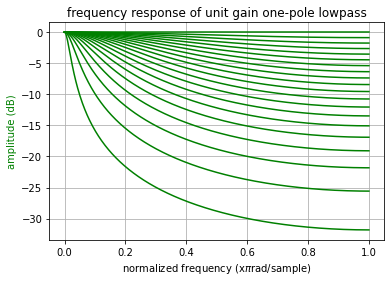

In [2]:
fig, ax1 = plt.subplots()
nums = 20

for i in range(nums):
    damp = i * 1/nums + 1/nums
    numerator = [damp, 0, 0]
    denominator = [1, damp-1, 0]
    w, h = scipy.signal.freqz(numerator, denominator)
    amplitude = 20 * np.log10(abs(h))
    ax1.plot(w/max(w), amplitude, 'g')

plt.title('frequency response of unit gain one-pole lowpass')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.grid()

plt.show()

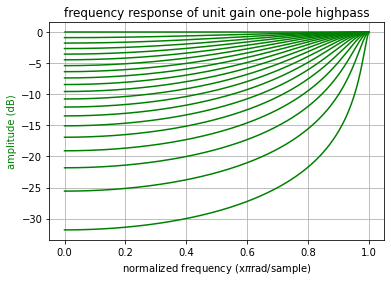

In [3]:
fig, ax1 = plt.subplots()
nums = 20

for i in range(nums):
    damp = i * 1/nums + 1/nums
    numerator = [-damp, 0, 0]
    denominator = [1, -damp+1, 0]
    w, h = scipy.signal.freqz(numerator, denominator)
    amplitude = 20 * np.log10(abs(h))
    ax1.plot(w/max(w), amplitude, 'g')

plt.title('frequency response of unit gain one-pole highpass')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.grid()

plt.show()

In [4]:
feedbackgain = 0.84
damp = 0.2
numerator = [feedbackgain*(1-damp)]
denominator = [1, -damp]
w, h = scipy.signal.freqz(numerator, denominator)

amplitude = 20 * np.log10(abs(h))
angle = np.angle(h)

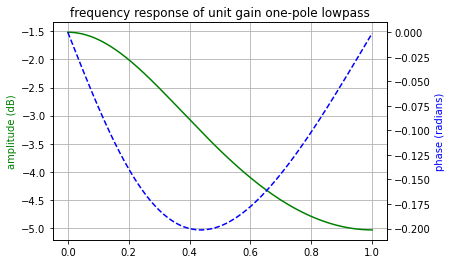

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of unit gain one-pole lowpass')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.show()

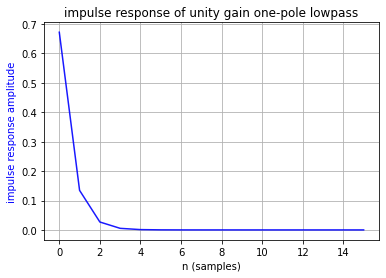

In [6]:
x_axis = np.arange(16)
impulse = np.zeros(16)
impulse[0] = 1.0
impulse_response = scipy.signal.lfilter(numerator, denominator, impulse)

plt.title('impulse response of unity gain one-pole lowpass')
plt.plot(x_axis, impulse_response, color='b', alpha=0.9)
plt.ylabel('impulse response amplitude', color='b')
plt.xlabel('n (samples)')
plt.grid()
plt.show()

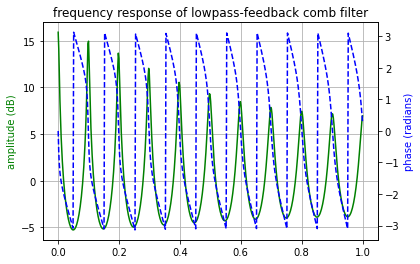

In [7]:
f = 0.84
d = 0.2

delaysample = 20
arraysize = delaysample+1

numerator = np.zeros(arraysize+1)
denominator = np.zeros(arraysize)

numerator[arraysize-1] = 1
numerator[arraysize] = -d

denominator[0] = 1
denominator[1] = -d
denominator[arraysize-1] = -f*(1-d)

w, h = scipy.signal.freqz(numerator, denominator)

amplitude = 20 * np.log10(abs(h))
angle = np.angle(h)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of lowpass-feedback comb filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.show()

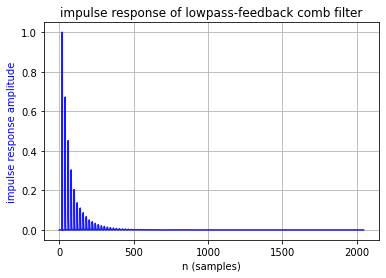

In [8]:
x_axis = np.arange(2048)
impulse = np.zeros(2048)
impulse[0] = 1.0

impulse_response = scipy.signal.lfilter(numerator, denominator, impulse)
plt.plot(x_axis, impulse_response, color='b', alpha=0.9)
plt.title('impulse response of lowpass-feedback comb filter')
plt.ylabel('impulse response amplitude', color='b')
plt.xlabel('n (samples)')
plt.grid()

plt.show()

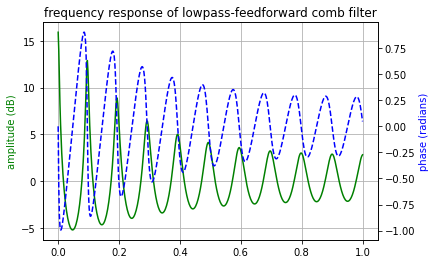

In [9]:
f = 0.84
d = 0.5

delaysample = 20
arraysize = delaysample+1

numerator = np.zeros(2)
denominator = np.zeros(arraysize)

numerator[0] = 1
numerator[1] = -d

denominator[0] = 1
denominator[1] = -d
denominator[arraysize-1] = -f*(1-d)

w, h = scipy.signal.freqz(numerator, denominator)

amplitude = 20 * np.log10(abs(h))
angle = np.angle(h)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of lowpass-feedforward comb filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.show()

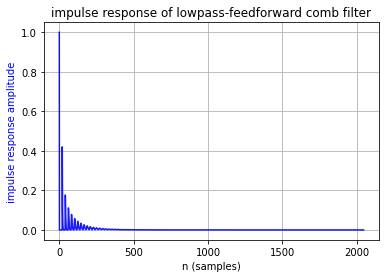

In [10]:
x_axis = np.arange(2048)
impulse = np.zeros(2048)
impulse[0] = 1.0

impulse_response = scipy.signal.lfilter(numerator, denominator, impulse)
plt.plot(x_axis, impulse_response, color='b', alpha=0.9)
plt.title('impulse response of lowpass-feedforward comb filter')
plt.ylabel('impulse response amplitude', color='b')
plt.xlabel('n (samples)')
plt.grid()

plt.show()